<a href="https://colab.research.google.com/github/Whaleman0423/-Python-book-practice/blob/main/tfKs_ch1_%E5%88%9D%E6%8E%A2Keras20211020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential # 序列式模型類別
from tensorflow.keras.layers import Dense # 密集層列別

In [2]:
model = Sequential() # 建立序列模型物件

model.add(Dense(4, activation="relu", input_dim=3)) # 加入第 1 層，第 1 層要加 input_dim
model.add(Dense(1, activation="sigmoid"))  # 加入第 2 層

model.compile(                  # 以指定的參數編譯模型
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
                      )


###### model = Sequential() 建立序列模型物件，並指定給 model，此時 model 就是一個神經網路了，但內容是空的。

##### Mnist

In [3]:
from tensorflow.keras.datasets import mnist
# mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


######第一次載入資料集，會由網路將資料下載並儲存到本機使用者資料夾

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[0]

5

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


###### 只秀一張圖

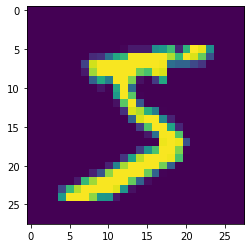

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

######隨機秀一張圖

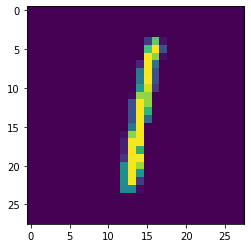

In [8]:
import random 
c = random.randint(0, 59999)
plt.imshow(train_images[c])

######連續秀一列圖

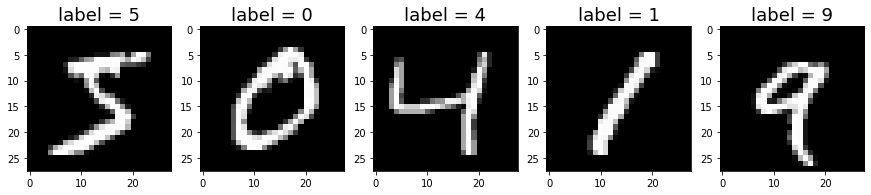

In [9]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)  # 設定圖形的寬和高(英吋)
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)  # 設定 1 * 5 的子圖表，目前要畫 1 + i 個
  ax.imshow(train_images[i], cmap="gray")  # 顯示灰階圖片(黑底白字)
  ax.set_title("label = " + str(train_labels[i]), fontsize=18)  # 設定標題
plt.show()  # 將圖形顯示出來

######隨機秀5張圖

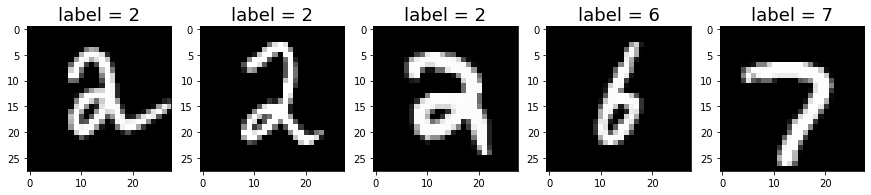

In [10]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
c = random.sample(range(0, 60000), 5)  # 隨機取得 1 ～ 60000中的 5 個字
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)
  ax.imshow(train_images[c[i]], cmap="gray")
  ax.set_title("label = " + str(train_labels[c[i]]), fontsize=18)
plt.show()

#####白底黑字，

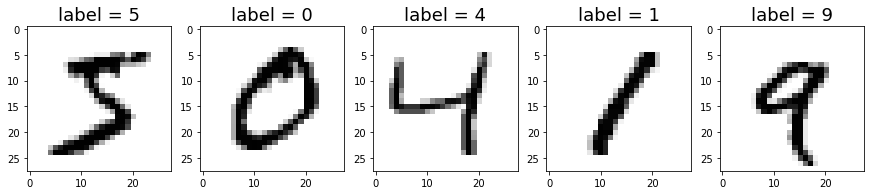

In [11]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
for i in range(5):
  axis = plt.subplot(1, 5, 1+i)
  axis.imshow(train_images[i], cmap="binary")
  axis.set_title("label = " + str(train_labels[i]), fontsize=18)
plt.show()

### 資料預處理(preprocess)

###### 1. 把 2D 轉成 1D
###### 2. 將像素值由 0～255 ，轉成 0～1

In [12]:
# 訓練集
x_train = train_images.reshape((60000, 28 * 28))  # 將 (60000, 28, 28) 轉換成 (60000, 784)
x_train = x_train.astype('float32') / 255.0  # 再將 0～255 的像素值轉換成 0～1的浮點數

# 測試集
x_test = test_images.reshape((10000, 28 * 28))   # 將10000筆測試集採同樣方式的轉換
x_test = x_test.astype("float32") / 255.0

###### 轉換後，再看一次shape

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


###### 標籤資料的轉換
###### 例如 : 將答案 2 轉換為 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
###### => One-hot-encoding

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)  # 將訓練標籤和測試答案做 One-hot-encoding
y_test = to_categorical(test_labels)

###### 做完 One-hot-encoding 看一下標籤的形式

In [15]:
print(train_labels[0])
print(y_train[0])
# 看一下 標籤的 shape
print(y_train.shape) # 原本是(60000,)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


### 預處理好樣本和標籤後，即可著手建立神經網路模型

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))
model.compile(
          optimizer="rmsprop",          # 指定優化器
          loss='categorical_crossentropy',    # 指定損失函數
          metrics=["acc"]             # 指定評量準則 
        )


#### 建好模型後，呼叫模型的 summary()，來檢視模型的摘要資訊。

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 用準備好的 x_train(訓練樣本) 和 y_train(標籤) ， fit() 訓練模型

In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2591 - acc: 0.9256
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1053 - acc: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - acc: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0498 - acc: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0377 - acc: 0.9888


####評估模型成效及修正  evaluate()

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("對測試資料集的準確率 : ", test_acc)
print("對測試資料集的lose : ", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - acc: 0.9796
對測試資料集的準確率 :  0.9796000123023987
對測試資料集的lose :  0.06493961066007614


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - acc: 0.9796


[0.06493961066007614, 0.9796000123023987]

#### 用模型預測答案

In [21]:
predict = model.predict(x_test)  # predict() 會回傳預測的結果
predict.round(1)  # 顯示四捨五入到小數一位的預測結果

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###### 想直接看預測結果，用 predict_classes()

In [22]:
# predict = model.predict_classes(x_test)  # 不行用了
import numpy as np
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)
print("預測結果: ", predict)
print("正確標籤: ", test_labels)

預測結果:  [7 2 1 ... 4 5 6]
正確標籤:  [7 2 1 ... 4 5 6]


##### 畫出測試圖片並標示預測結果與標準答案

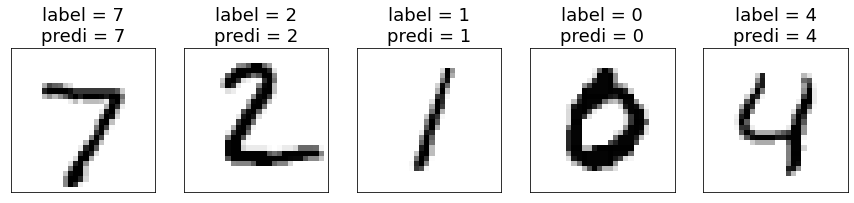

In [23]:
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)
plt.gcf().set_size_inches(15, 4)
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)
  ax.imshow(test_images[i], cmap="binary")
  ax.set_title("label = " + str(test_labels[i]) + '\npredi = ' + str(predict[i]), fontsize=18)    
  ax.set_xticks([]); ax.set_yticks([])  
plt.show()

###### 顯示錯誤

<Figure size 936x288 with 0 Axes>

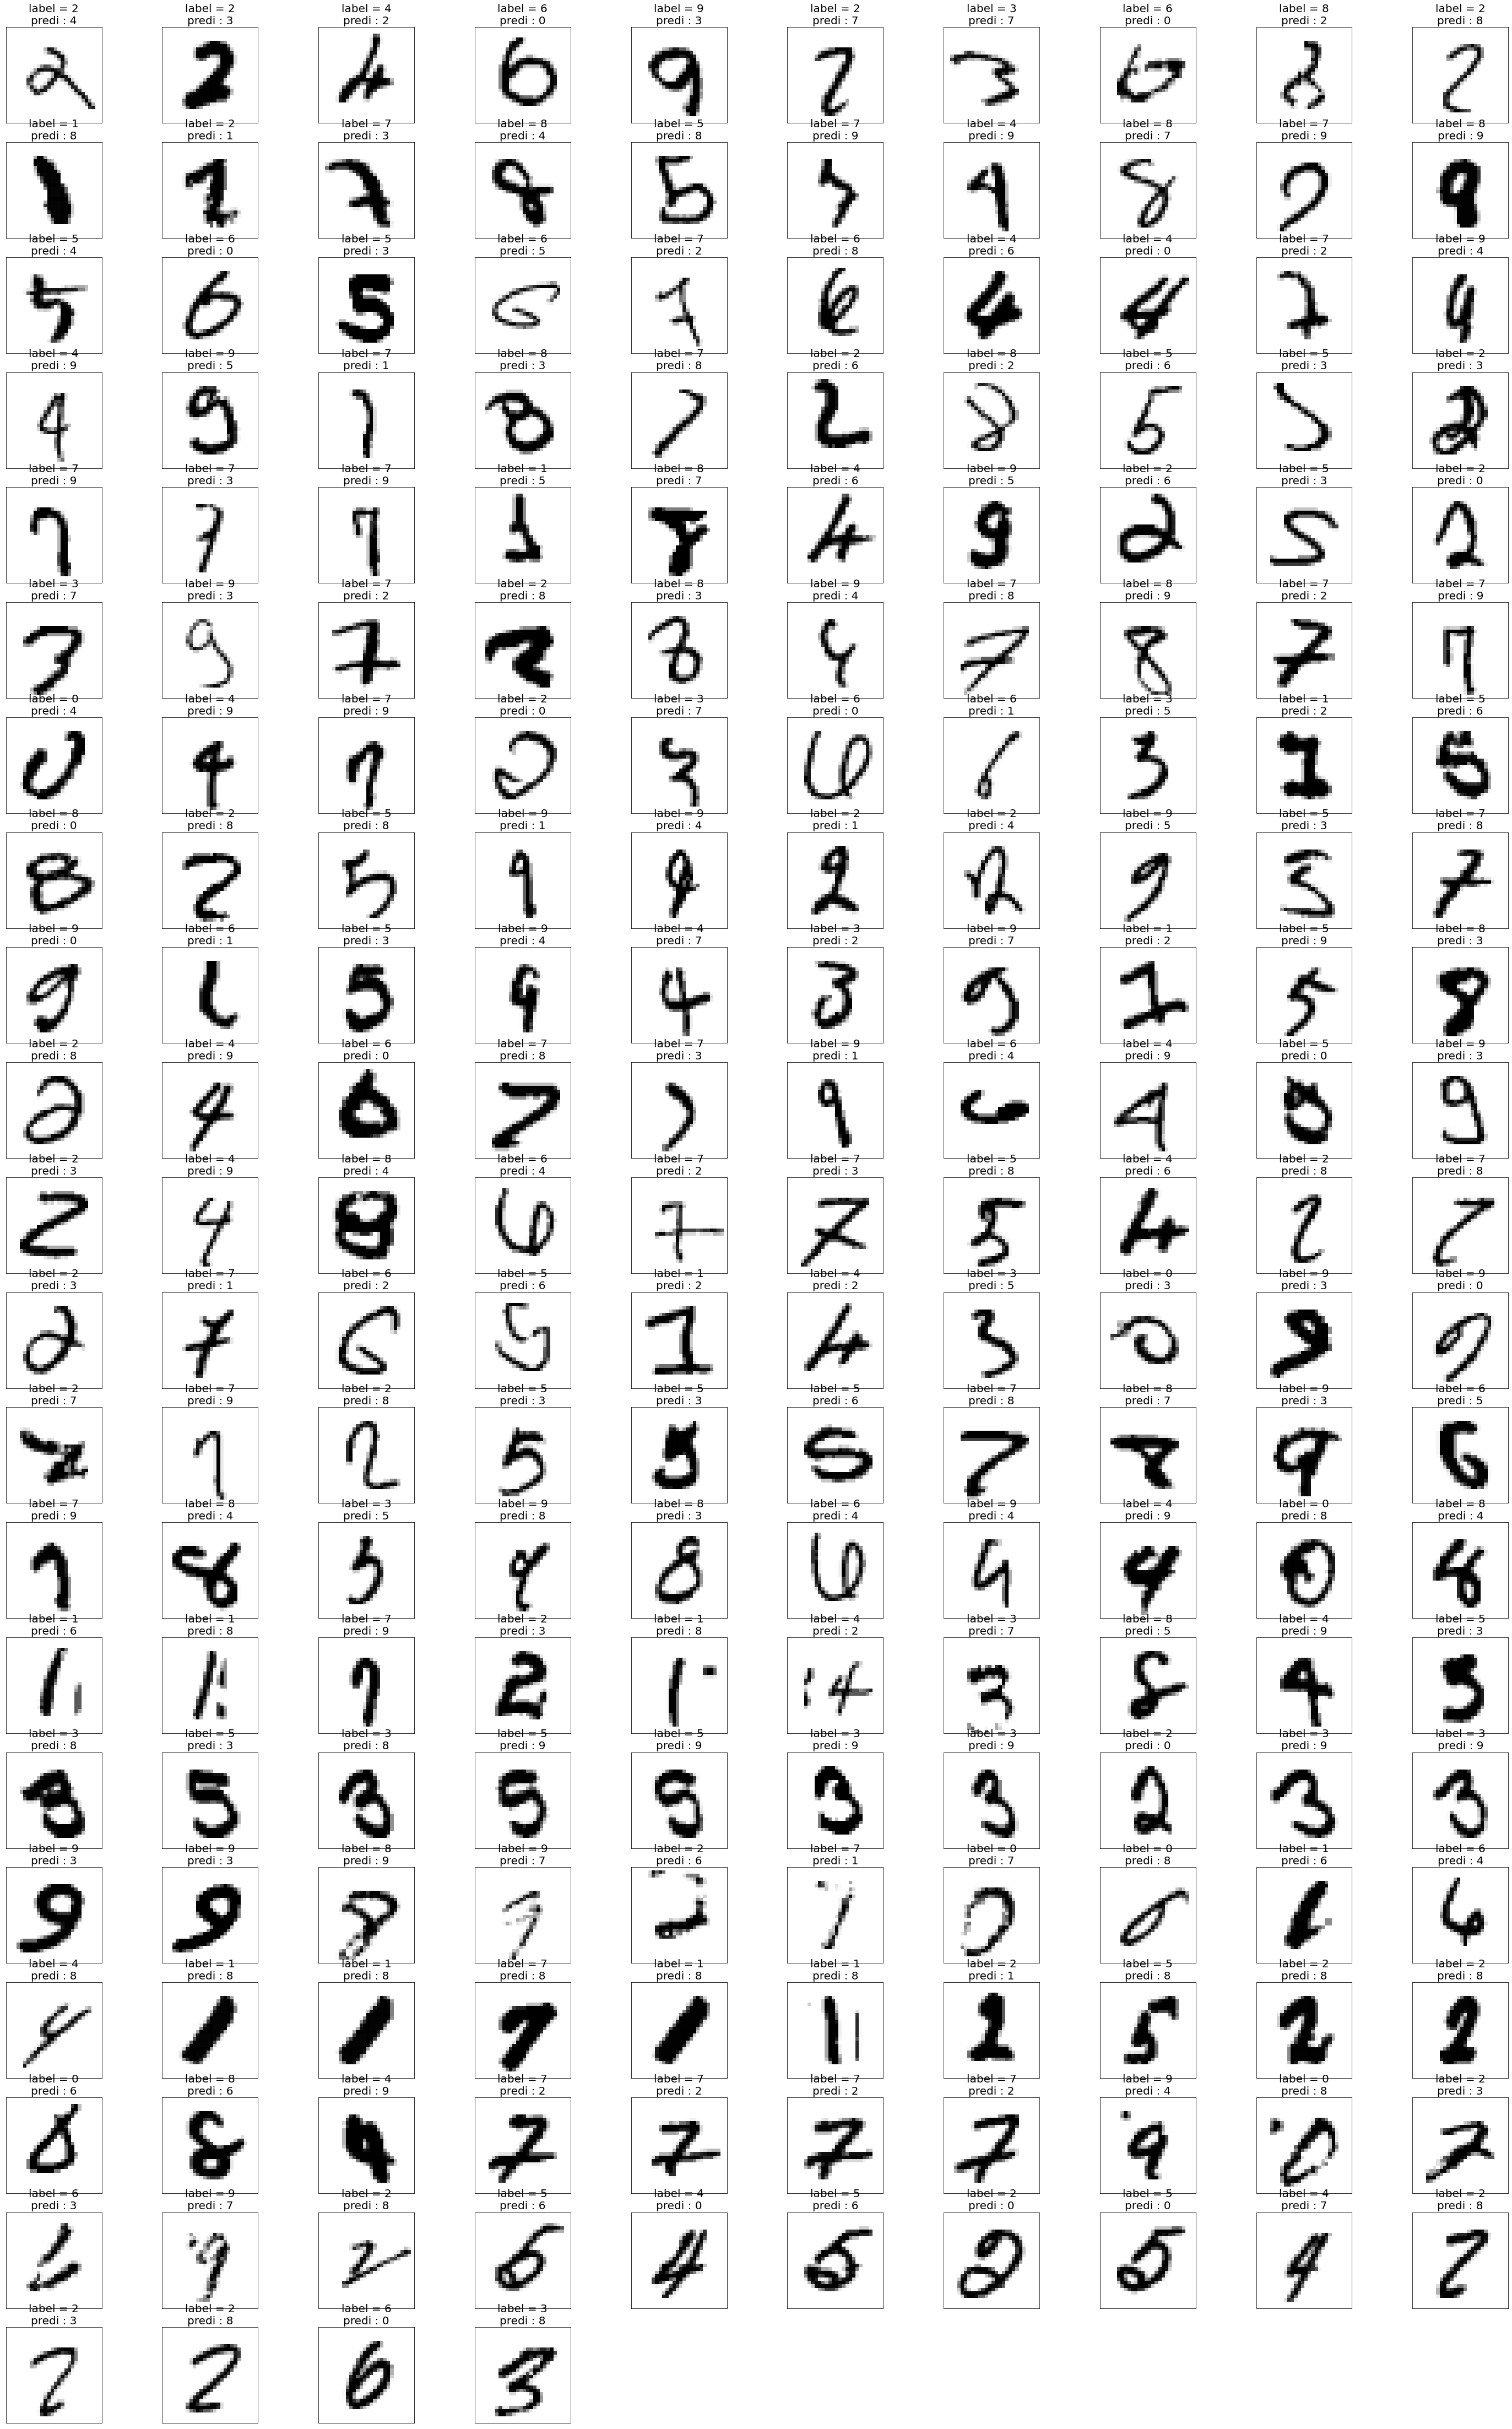

In [26]:
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)

errors = []
for i in range(10000):
  if predict[i] != test_labels[i]:
    errors.append(i)
plt.gcf().set_size_inches(13, 4)
plt.figure(figsize=(50,80))

for i in range(len(errors)):
  ax = plt.subplot(21, 10, 1+i)
  ax.imshow(test_images[errors[i]], cmap="binary")
  ax.set_title("label = " +str(test_labels[errors[i]]) + "\npredi : " + str(predict[errors[i]]), fontsize=20)
  ax.set_xticks([]); ax.set_yticks([])
plt.show()

#### 呼叫 save() 將模型儲存成 HDF5 (.h5)

In [27]:
model.save("MnistModel.h5")

##### 若要刪除模型， 可用del model

###由檔案載入，並使用模型，

In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model    # 載入 load_model 函式

model = load_model("MnistModel.h5")       # 載入模型
(_,_), (test_images, test_labels) = mnist.load_data() # 載入 Mnist 資料集

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype("float32") / 255.0          # 測試資料集預處理
y_test = to_categorical(test_labels)              # 測試集標籤預處理

test_loss, test_acc = model.evaluate(x_test, y_test)
print("對測試資料的準確率", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - acc: 0.9796
對測試資料的準確率 0.9796000123023987


## 1-5後面都是測試，怎樣準確率最高、怎樣影響準確率...，有點多先跳過，看 1-6 。

#### 1-6 點積:
##### 兩個向量的點積，即將同位置的元素相乘，然後再將結果加總起來，最後變成一個純量。

In [30]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.dot(x, y)  # 1*4 + 2*5 + 3*6  # 最後的結果是純量

32

###### 兩個向量的維度必須相同，其對應元素才能做點積，例如上面的 2 個向量的 shape 都是 (3,)

###矩陣和矩陣的點積運算:

##### 以 shape (3, 2) 和 (2, 3) 的矩陣點積來說明 :

In [32]:
x = np.array([               # 3*2
          [1, 2],
          [3, 4],                #  => 3*2、2*3 => 3*3 => 前者第1軸、後者第0軸維度必須相等 => 才能做點積運算 
          [5, 6]])

y = np.array([               # 2*3
          [1, 2, 3],
          [4, 5, 6]])
np.dot(x, y)                # 3*3

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

#####矩陣和向量的點積

In [34]:
x = np.array([              # 2*3
        [1, 2, 3],
        [4, 5, 6]
              ])
y = np.array([7, 8, 9])        # 3,
np.dot(x, y)               # 2,

array([ 50, 122])